In [27]:
import numpy as np
from tqdm import tqdm_notebook

In [2]:
def get_euclidean_distance(A_matrix,B_matrix):
    A_square=np.reshape(np.sum(A_matrix*A_matrix,axis=1),(A_matrix.shape[0],1))
    B_square=np.reshape(np.sum(B_matrix*B_matrix,axis=1),(1,B_matrix.shape[0]))
    AB = A_matrix @ B_matrix.T
    C=-2*AB+B_square+A_square
    return np.sqrt(C)
    """
    Function computes euclidean distance between matrix A and B
    Args:
        A_matrix (numpy.ndarray): Matrix size N1:D
        B_matrix (numpy.ndarray): Matrix size N2:D

    Returns:
        numpy.ndarray: Matrix size N1:N2
    """

In [3]:
X=np.array([[1,2,3],[-4,-5,-6]])
X_train=np.array([[0,0,0],[1,2,3],[4,5,6],[-4,4,-6]])
print("X: {} Exaples in {} Dimensional space".format(*X.shape))
print("X_train: {} Exaples in {} Dimensional space".format(*X_train.shape))


print()

print("X:")
print(X)

print()

print("X_train")
print(X_train)

X: 2 Exaples in 3 Dimensional space
X_train: 4 Exaples in 3 Dimensional space

X:
[[ 1  2  3]
 [-4 -5 -6]]

X_train
[[ 0  0  0]
 [ 1  2  3]
 [ 4  5  6]
 [-4  4 -6]]


In [4]:
distance_matrix=get_euclidean_distance(X,X_train)
print("Distance Matrix shape: {}".format(distance_matrix.shape))
print("Distance between first example from X and first form X_train {}".format(distance_matrix[0,0]))
print("Distance between first example from X and second form X_train {}".format(distance_matrix[0,1]))

Distance Matrix shape: (2, 4)
Distance between first example from X and first form X_train 3.7416573867739413
Distance between first example from X and second form X_train 0.0


In [5]:
def get_sorted_train_labels(distance_matrix,y):
    """
    Function sorts y labels, based on probabilities from distances matrix
    Args:
        distance_matrix (numpy.ndarray): Distance Matrix, between points from X and X_train, size: N1:N2
        y (numpy.ndarray): vector of classes of X points, size: N1

    Returns:
        numpy.ndarray: labels matrix sorted according to distances to nearest neightours, size N1:N2 

    """
    order=distance_matrix.argsort(kind="mergersort")
    return np.squeeze(y[order])

In [6]:
y_train=np.array([[1,1,2,3]]).T
print("Labels array {} Examples in {} Dimensional Space".format(*y_train.shape))

print("Distance matrix shape {}".format(distance_matrix.shape))

sorted_train_labels = get_sorted_train_labels(distance_matrix, y_train)

print("Sorted train labels {} shape".format(sorted_train_labels.shape))
print("Closest 3 classes for first element from set X: {}".format(sorted_train_labels[0, :3]))

Labels array 4 Examples in 1 Dimensional Space
Distance matrix shape (2, 4)
Sorted train labels (2, 4) shape
Closest 3 classes for first element from set X: [1 1 2]


In [7]:
def get_p_y_x_using_knn(y,k):
    first_k_neighbors=y[:,:k]
    N1,N2=y.shape
    classes=np.unique(y)
    number_of_classes=classes.shape[0]
    probabilities_matrix=np.zeros(shape=(N1,number_of_classes))
    for i,row in enumerate(first_k_neighbors):
        for j,value in enumerate(classes):
            probabilities_matrix[i][j]=list(row).count(value)/k
    return probabilities_matrix

In [8]:
print("Sorted train labels:")
print(sorted_train_labels)

probabilities_matrix = get_p_y_x_using_knn(y=sorted_train_labels, k=4)



print("Probability fisrt element belongs to 1-st class: {:2f}".format(probabilities_matrix[0,0]))
print("Probability fisrt element belongs to 3-rd class: {:2f}".format(probabilities_matrix[0,2]))

Sorted train labels:
[[1 1 2 3]
 [1 3 1 2]]
Probability fisrt element belongs to 1-st class: 0.500000
Probability fisrt element belongs to 3-rd class: 0.250000


In [9]:
def predict(X,X_train,y_train,k,distance_function):
    distance_matrix=distance_function(X,X_train)
    sorted_labels=get_sorted_train_labels(distance_matrix=distance_matrix,y=y_train)
    p_y_x=get_p_y_x_using_knn(y=sorted_labels,k=k)
    number_of_classes=p_y_x.shape[1]
    reversed_rows=np.fliplr(p_y_x)
    prediction=number_of_classes-(np.argmax(reversed_rows,axis=1)+1)
    return prediction

In [10]:
prediction = predict(X, X_train, y_train, 3, get_euclidean_distance)

print("Predicted propabilities of classes for for first observation", probabilities_matrix[0])
print("Predicted class for for first observation", prediction[0])

print()

print("Predicted propabilities of classes for for second observation", probabilities_matrix[1])
print("Predicted class for for second observation", prediction[1])

Predicted propabilities of classes for for first observation [0.5  0.25 0.25]
Predicted class for for first observation 0

Predicted propabilities of classes for for second observation [0.5  0.25 0.25]
Predicted class for for second observation 0


In [11]:
def count_accuracy(prediction,y_true):
    N1=prediction.shape[0]
    accuracy=np.sum(prediction==y_true)/N1
    return accuracy

In [12]:
y_true=np.array([[0,2]])
predicton = predict(X, X_train, y_train, 3, get_euclidean_distance)


print("True classes:{}, accuracy {}%".format(y_true, count_accuracy(predicton, y_true)  * 100))

True classes:[[0 2]], accuracy 50.0%


In [25]:
def select_knn_model(X_validation, y_validation, X_train, y_train, k_values, distance_function):
    """
    Function returns k parameter that best fit Xval points
    Args:
        Xval (numpy.ndarray): set of Validation Data, size N1:D
        Xtrain (numpy.ndarray): set of Training Data, size N2:D
        yval (numpy.ndarray): set of labels for Validation data, size N1:1
        ytrain (numpy.ndarray): set of labels for Training Data, size N2:1
        k_values (list): list of int values of k parameter that should be checked

    Returns:
        int: k paprameter that best fit validation set
    """

    accuracies = []

    for k in tqdm_notebook(k_values):
        prediction = predict(X_validation, X_train, y_train, k, distance_function)

        accuracy = count_accuracy(prediction, y_validation)
        accuracies.append(accuracy)

    best_k = k_values[accuracies.index(max(accuracies))]

    return best_k, accuracies

In [14]:
from sklearn import datasets
import matplotlib.pyplot as plt
iris=datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

print("Iris: {} examples in {} dimensional space".format(*iris_X.shape))
print("First example in dataset :\n Speal lenght: {}cm \n Speal width: {}cm \n Petal length: {}cm \n Petal width: {}cm".format(*iris_X[0]))

print("Avalible classes", np.unique(iris_y))

Iris: 150 examples in 4 dimensional space
First example in dataset :
 Speal lenght: 5.1cm 
 Speal width: 3.5cm 
 Petal length: 1.4cm 
 Petal width: 0.2cm
Avalible classes [0 1 2]


In [35]:
iris

<function sklearn.datasets.base.load_iris(return_X_y=False)>

In [15]:
iris_X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
from sklearn.utils import shuffle

In [18]:
iris_X,iris_y=shuffle(iris_X,iris_y,random_state=134)
test_size=30
validation_size=30
training_size=90
X_test=iris_X[:test_size]
X_validation=iris_X[test_size:(test_size+validation_size)]
X_train=iris_X[(test_size+validation_size):]
y_test=iris_y[:test_size]
y_validation=iris_y[test_size:(test_size+validation_size)]
y_train=iris_y[(test_size+validation_size):]

C:\Users\Admin\anaconda3\envs\tensoraksh\lib\site-packages\ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


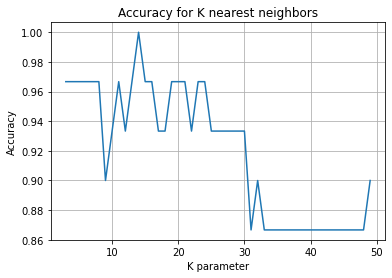

In [28]:
k_values=[i for i in range(3,50)]
best_k,accuracies=select_knn_model(X_validation,y_validation,X_train,y_train,k_values,distance_function=get_euclidean_distance)
plt.plot(k_values,accuracies)
plt.xlabel("K parameter")
plt.ylabel("Accuracy")
plt.title("Accuracy for K nearest neighbors")
plt.grid()
plt.show()

In [29]:
prediction=predict(X_test,X_train,y_train,best_k,get_euclidean_distance)
accuracy=count_accuracy(prediction,y_test)
print("Accuracy for best k={}: {:2f}%".format(best_k, accuracy*100))

Accuracy for best k=14: 93.333333%


In [33]:
!pip install opencv-python

In [36]:
from sklearn.datasets import load_digits

In [41]:
mnist = load_digits()
mnist.data.shape

(1797, 64)

In [ ]:
# train_data=pd.read_csv("E:\\AKPROJECTS\\KNN FROM SCRATCH\\mnist\\mnist_train.csv")
# test=pd.read_csv("E:\\AKPROJECTS\\KNN FROM SCRATCH\\mnist\\mnist_test.csv")
# train_images=train_data
# train_labels=train_data
# test_images=test
# test_labels=test

In [51]:
#MNIST DATA
import utils
import cv2
import pandas as pd
training_size=49000
validation_size=1000
test_size=1000
train_data, test = utils.get_mnist_dataset()

train_images, train_labels = train_data
test_images, test_labels = test

validation_images=train_images[training_size:training_size+validation_size]
train_images=train_images[:training_size]
validation_labels=train_labels[training_size:training_size+validation_size]
train_labels=train_labels[:training_size]
test_images=test_images[:test_size]
test_labels=test_labels[:test_size]
print("Training images matrix size: {}".format(train_images.shape))
print("Training labels matrix size: {}".format(train_labels.shape))

print("Validation images matrix size: {}".format(validation_images.shape))
print("Validation labels matrix size: {}".format(validation_labels.shape))

print("Testing images matrix size: {}".format(test_images.shape))
print("Testing labels matrix size: {}".format(test_labels.shape))

print("Possible labels {}".format(np.unique(test_labels)))

FileNotFoundError: [Errno 2] No such file or directory: 'knn/mnist.pkl'

In [46]:
from matplotlib.gridspec import GridSpec

In [47]:
def show_first_8(images):
    ax=[]
    fig=plt.figure(figsize=(10,10))
    gs=GridSpec(2,4,wspace=0.0,hspace=-0.5)
    for i in range(2):
        for j in range(4):
            ax.append(fig.add_subplot(gs[i,j]))
    for i,axis in enumerate(ax):
        axis.imshow(images[i])
    plt.show()
            

In [49]:
first_8_images = train_images[:8]
resized = np.reshape(first_8_images, (-1,157,40))
print('First 8 images of train set:')
show_first_8(resized)

ValueError: Must pass 2-d input. shape=(1, 157, 40)